# 영화 관객수 예측
## 9팀

데이콘 내 2010년대 한국영화 관객수 예측 모델 개발 데이터를 이용해 관객수 예측 모델을 작성해보았다.

출처 : https://dacon.io/competitions/open/235536/overview/description


## 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor

In [2]:
df_train = pd.read_csv("../438b66124a5ab797/movies_train.csv")
df_test = pd.read_csv("../438b66124a5ab797/movies_test.csv")

df_train.columns = ["영화제목", "배급사", "장르", "개봉일", "상영시간(분)", "상영등급", "감독이름", "감독평균관객수", "감독참여영화", "스태프수", "주연배우수", "관객수"]
df_test.columns = ["영화제목", "배급사", "장르", "개봉일", "상영시간(분)", "상영등급", "감독이름", "감독평균관객수", "감독참여영화", "스태프수", "주연배우수"]

## 데이터 상태 확인하기

### train set

In [3]:
df_train.shape

(600, 12)

In [4]:
df_train.head()

,영화제목,배급사,장르,개봉일,상영시간(분),상영등급,감독이름,감독평균관객수,감독참여영화,스태프수,주연배우수,관객수
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
df_train.tail()

,영화제목,배급사,장르,개봉일,상영시간(분),상영등급,감독이름,감독평균관객수,감독참여영화,스태프수,주연배우수,관객수
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [6]:
df_train.info()  ## 관객평균관객수에 null 값이 좀 있는듯

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   영화제목     600 non-null    object 
 1   배급사      600 non-null    object 
 2   장르       600 non-null    object 
 3   개봉일      600 non-null    object 
 4   상영시간(분)  600 non-null    int64  
 5   상영등급     600 non-null    object 
 6   감독이름     600 non-null    object 
 7   감독평균관객수  270 non-null    float64
 8   감독참여영화   600 non-null    int64  
 9   스태프수     600 non-null    int64  
 10  주연배우수    600 non-null    int64  
 11  관객수      600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [7]:
df_train.describe() ## 주연배우가 0? 스태프 수가 0? -> 이상치

,상영시간(분),감독평균관객수,감독참여영화,스태프수,주연배우수,관객수
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [8]:
df_train[df_train["주연배우수"] == 0] ## 다큐멘터리나 뮤지컬이면 그럴 수 있을듯

,영화제목,배급사,장르,개봉일,상영시간(분),상영등급,감독이름,감독평균관객수,감독참여영화,스태프수,주연배우수,관객수
107,미국의 바람과 불,시네마 달,다큐멘터리,2012-07-26,118,15세 관람가,김경만,NaN,0,6,0,652
167,모래가 흐르는 강,시네마 달,다큐멘터리,2013-03-28,75,전체 관람가,지율스님,NaN,0,11,0,10942
168,망대,골든타이드픽처스,다큐멘터리,2015-03-12,66,전체 관람가,문승욱,NaN,0,13,0,65
355,오디세오,(주)패뷸러스,뮤지컬,2015-10-22,80,전체 관람가,정성복,NaN,0,0,0,862
391,명령불복종 교사,인디플러그,다큐멘터리,2015-05-14,96,전체 관람가,서동일,NaN,0,3,0,1827
418,오월愛,상구네 필름,다큐멘터리,2011-05-12,104,전체 관람가,김태일,NaN,0,4,0,4092
425,보라,시네마달,다큐멘터리,2011-11-24,136,전체 관람가,이강현,NaN,0,7,0,389
437,나쁜 나라,(주)시네마달,다큐멘터리,2015-12-03,120,12세 관람가,김진열,NaN,0,2,0,21576
456,"60년전, 사선에서",인터콘미디어,다큐멘터리,2010-06-24,63,전체 관람가,박성미,NaN,0,10,0,79


In [9]:
df_train[df_train["스태프수"] == 0].sample(10) ## 애매한 수치들이 포함..

,영화제목,배급사,장르,개봉일,상영시간(분),상영등급,감독이름,감독평균관객수,감독참여영화,스태프수,주연배우수,관객수
339,바보야,(주)마운틴픽쳐스,다큐멘터리,2011-04-21,73,전체 관람가,강성옥,NaN,0,0,2,17912
275,아름다운 유산,제나두 엔터테인먼트,드라마,2011-04-14,104,전체 관람가,김창만,NaN,0,0,6,678
541,어이그 저 귓것,영화사 진진,드라마,2011-08-25,90,전체 관람가,오멸,NaN,0,0,5,732
238,미쓰 마마,찬란,다큐멘터리,2012-10-18,82,15세 관람가,백연아,2914.00,1,0,4,1526
88,야누스: 욕망의 두 얼굴,(주)패스파인더씨앤씨,미스터리,2014-08-14,83,청소년 관람불가,손영국,332.00,1,0,3,4122
567,술에 대하여 - 극장판,이모션 픽처스,다큐멘터리,2011-09-01,72,15세 관람가,임범,NaN,0,0,2,541
549,맛있는 택배,(주)로드하우스,멜로/로맨스,2015-04-02,84,청소년 관람불가,기대호,NaN,0,0,1,6226
526,고스트 메신저 극장판,에이원 엔터테인먼트,애니메이션,2014-05-22,78,12세 관람가,구봉회,NaN,0,0,5,23802
500,한양 기방 춘향뎐,(주) 케이알씨지,멜로/로맨스,2015-11-25,89,청소년 관람불가,김민욱,NaN,0,0,1,400
307,당신은 아름답다,마운틴 픽처스,다큐멘터리,2010-08-26,75,전체 관람가,백승창,481459.25,4,0,1,240


### test set

In [10]:
df_test.shape ## output column이 하나 빠짐

(243, 11)

In [11]:
df_test.info() ## test와 마찬가지로 감독평균관객수에 null 값이 좀 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   영화제목     243 non-null    object 
 1   배급사      243 non-null    object 
 2   장르       243 non-null    object 
 3   개봉일      243 non-null    object 
 4   상영시간(분)  243 non-null    int64  
 5   상영등급     243 non-null    object 
 6   감독이름     243 non-null    object 
 7   감독평균관객수  107 non-null    float64
 8   감독참여영화   243 non-null    int64  
 9   스태프수     243 non-null    int64  
 10  주연배우수    243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [12]:
df_test.head()

,영화제목,배급사,장르,개봉일,상영시간(분),상영등급,감독이름,감독평균관객수,감독참여영화,스태프수,주연배우수
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [13]:
df_test.tail()

,영화제목,배급사,장르,개봉일,상영시간(분),상영등급,감독이름,감독평균관객수,감독참여영화,스태프수,주연배우수
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.0,1,4,4
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.0,1,68,7
242,조선안방 스캔들-칠거지악 2,(주) 케이알씨지,멜로/로맨스,2015-10-22,76,청소년 관람불가,이전,NaN,0,10,4


## EDA

<AxesSubplot:>

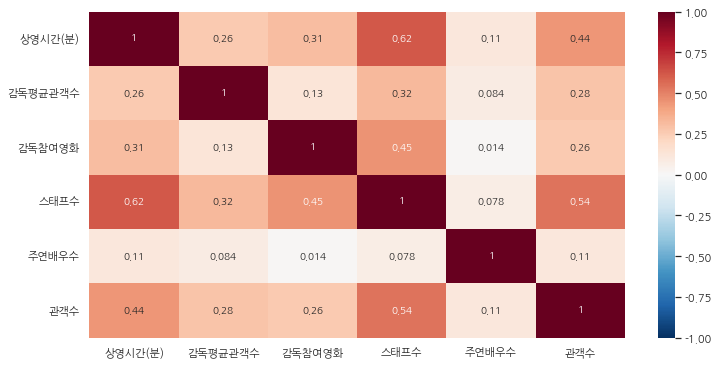

In [14]:
df_train_corr = df_train.corr(method = "pearson")
plt.figure(figsize = (12,6))
sns.heatmap(df_train_corr, annot= True, cmap = "RdBu_r", vmax = 1, vmin = -1, )
### 상영시간(분), 스태프수 가 기본적으로 관객수와 정적상관이 높음

### 전처리
팀원들이 각자 컬럼별로 파트를 맡아서 전처리 후 개인적으로 추가 전처리

범주형 컬럼들을 수치화 하기 위해, 각 컬럼에서 구분별 관객수 중앙값을 활용해 순위 계산

#### 배급사(지홍)

In [15]:
dstb_list = df_train["배급사"].unique().tolist()
dstb_list.sort()
dstb_list
# 기본적으로 (주)/(유)는 좀 불필요해보이고 같은 회사가 다른이름으로 들어간 케이스들이 존재 (예: 'CGV 무비꼴라쥬',
#  'CGV 아트하우스',  'CGV아트하우스',  'CJ CGV',  'CJ E&M Pictures',  'CJ E&M 영화부문',  'CJ 엔터테인먼트'

['(주) 브릿지웍스',
 '(주) 액티버스엔터테인먼트',
 '(주) 영화사조제',
 '(주) 영화제작전원사',
 '(주) 케이알씨지',
 '(주)JK필름',
 '(주)NEW',
 '(주)고앤고 필름',
 '(주)노버스엔터테인먼트',
 '(주)대명문화공장',
 '(주)더픽쳐스',
 '(주)두타연',
 '(주)드림팩트엔터테인먼트',
 '(주)랠리버튼',
 '(주)레인보우 팩토리',
 '(주)로드하우스',
 '(주)리틀빅픽처스',
 '(주)마운틴픽쳐스',
 '(주)마인스 엔터테인먼트',
 '(주)마인스엔터테인먼트',
 '(주)미디어데이',
 '(주)쇼박스',
 '(주)스마일이엔티',
 '(주)스톰픽쳐스코리아',
 '(주)시네마달',
 '(주)씨엠닉스',
 '(주)아우라픽처스',
 '(주)아이필름코퍼레이션',
 '(주)에이원 엔터테인먼트',
 '(주)엣나인필름',
 '(주)예지림 엔터테인먼트',
 '(주)온비즈넷',
 '(주)유비네트워크',
 '(주)유비콘텐츠',
 '(주)이스트스카이필름',
 '(주)콘텐츠 윙',
 '(주)키노아이',
 '(주)팝 파트너스',
 '(주)팝엔터테인먼트',
 '(주)패뷸러스',
 '(주)패스파인더씨앤씨',
 '(주)프레인글로벌',
 '(주)피터팬픽쳐스',
 '(주)휘엔터테인먼트',
 'BoXoo 엔터테인먼트',
 'CGV 무비꼴라쥬',
 'CGV 아트하우스',
 'CGV아트하우스',
 'CJ CGV',
 'CJ E&M Pictures',
 'CJ E&M 영화부문',
 'CJ 엔터테인먼트',
 'KBS미디어(주)',
 'KT',
 'KT&G 상상마당',
 'M2픽처스',
 'NEW',
 'OAL(올)',
 'SBS콘텐츠허브',
 'SK텔레콤(주)',
 'SK플래닛',
 'THE 픽쳐스',
 'tvN',
 'ysfilm',
 '건시네마',
 '고구마공작소',
 '골든타이드픽처스',
 '김기덕 필름',
 '나우콘텐츠',
 '나이너스엔터테인먼트(주)',
 '노바엔터테인먼트',
 '더 피플',
 '더픽쳐스/(주)마운틴픽쳐스',
 '동국대학교 충

In [16]:
df_train["배급사"].sort_values().nunique() ## 전처리 전 배급사 개수 

169

<AxesSubplot:>

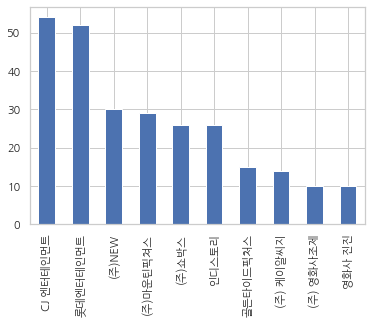

In [17]:
df_train["배급사"].value_counts().nlargest(10).plot.bar(x = "배급사") ##  train set에 포함된 배급사 빈도 상위 10개 회사

<AxesSubplot:>

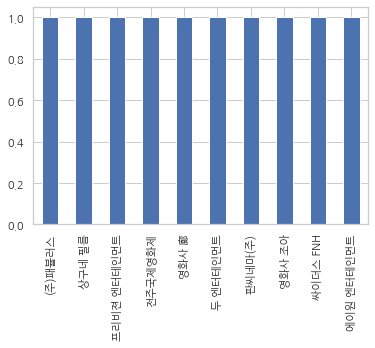

In [18]:
df_train["배급사"].value_counts().nsmallest(10).plot.bar(x = "배급사") ##  train set에 포함된 배급사 빈도 하위 10개 회사 (모두 1)

* 배급사 전처리 전략

df_train과 df_test를 합친후

1) (유)/(주)/엔터테인먼트/스튜디오/영화사 등의 의미가 적은 단어들 제거 후 split후 앞단어의 3글자 -> "배급사명_요약"

2) "배급사명_요약"에 따라 빈도수 계산 -> "배급사_빈도"

3) "배급사명_요약"에 따라 관객수 중앙값 계산 -> "배급사_관객순위"

In [19]:
def preprocessing_dstb(df_train, df_test):
    df = pd.concat([df_train[["배급사"]], df_test[["배급사"]]])
    df["배급사명_요약"] = df["배급사"].str.replace('\(유\)|\(주\)|엔터테인먼트|스튜디오|영화사', ' ').str.split().map(lambda x : x[0][:3])
    
    abbr_dict = dict(df[["배급사", '배급사명_요약']].values)

    df_train["배급사명_요약"] = df_train["배급사"].map(abbr_dict)     
    df_test["배급사명_요약"] = df_test["배급사"].map(abbr_dict)

    cnt_dict = dict(df["배급사명_요약"].value_counts())
    
    df_train["배급사_빈도"] = df_train["배급사명_요약"].map(cnt_dict)
    df_test["배급사_빈도"] = df_test["배급사명_요약"].map(cnt_dict)
    
    rank_dict = dict(df_train.groupby(["배급사명_요약"])["관객수"].median().rank(ascending = False))
    
    df_train["배급사_관객순위"] = df_train["배급사명_요약"].map(rank_dict)
    df_test["배급사_관객순위"] = df_test["배급사명_요약"].map(rank_dict)
    
    return df_train, df_test, abbr_dict, cnt_dict, rank_dict

df_train, df_test, dstb_abbr_dict,  dstb_cnt_dict,  dstb_rank_dict = preprocessing_dstb(df_train, df_test)

In [20]:
print(df_train["배급사명_요약"].unique()) ## 완벽하진 않지만 어느정도 중복 제거
df_train["배급사명_요약"].nunique()

['롯데' '쇼박스' 'NEW' '백두대' '유니버' '두타연' '케이알' '콘텐츠' '키노아' '팝' 'CJ' '영화제' 'CGV'
 '리틀빅' '스폰지' '조이앤' '인디플' '인디스' '시네마' '웃기씨' '진진' '레인보' '김기덕' '동국대' 'BoX'
 '마운틴' '메가박' '골든타' '파이오' '디' '드림팩' '시너지' '디마' '판다미' '스톰픽' '예지림' '조제' '보람'
 '노바' '패스파' '대명문' '온비즈' 'KT&' '무비꼴' '인벤트' '씨네그' '후크' '나이너' 'THE' '영구아'
 '어뮤즈' '이모션' '이스트' '필라멘' '타임스' '휘' '이십세' '피터팬' '에스와' '더픽쳐' '오퍼스' '고앤고'
 '사람과' 'JK필' '씨너스' 'KT' '싸이더' '프레인' '나우콘' '홀리가' '브릿지' '엣나인' '위더스' '에이원'
 'OAL' '전망좋' '스토리' '이상우' '씨네굿' '영희야' '찬란' '어썸' '아방가' '스크린' '와이드' 'tvN'
 '액티버' '제나두' '아이필' '쟈비스' '트리필' '에스피' '건시네' '키노' '아우라' '에이블' '드림로' '인피니'
 '새인컴' '느림보' '필름라' 'M2픽' '고구마' '미디어' '마노' '화앤담' '스마일' '패뷸러' '조아' '판씨네' '두'
 '마인스' '전주국' '상구네' '케이엠' '유비네' '한국Y' 'KBS' '더' '위드시' '팜코리' '씨엠닉' 'SBS'
 '인터콘' '유비콘' '프로젝' '하준사' '노버스' '주머니' '롤러코' 'SK플' '서울독' '블루' '랠리버' '머스트'
 'SK텔' '마법사' '로드하' '미라클' '프리비' '廊' '크리에' 'ysf' '이달투' '퍼스트']


145

In [21]:
dstb_cnt = pd.DataFrame.from_dict(dstb_cnt_dict, orient = "index").reset_index()
dstb_cnt = dstb_cnt.rename(columns = {"index" : "배급사명_요약", 0 : "배급사_빈도"})
dstb_cnt

# 이름을 들어본 CJ, 롯데 등 유명 배급사들의 작품 수가 많음

,배급사명_요약,배급사_빈도
0,CJ,92
1,롯데,76
2,NEW,48
3,마운틴,47
4,쇼박스,42
...,...,...
169,아이필,1
170,tvN,1
171,스크린,1
172,아방가,1


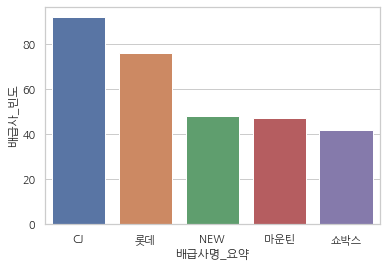

In [22]:
_=sns.barplot(data = dstb_cnt.nlargest(5, "배급사_빈도"), x = "배급사명_요약", y = "배급사_빈도")

In [23]:
dstb_rank = pd.DataFrame.from_dict(dstb_rank_dict, orient = "index").reset_index()
dstb_rank = dstb_rank.rename(columns = {"index" : "배급사명_요약", 0 : "배급사_관객순위"})
dstb_rank.nsmallest(5, "배급사_관객순위")

,배급사명_요약,배급사_관객순위
75,아이필,1.0
84,영구아,2.0
60,쇼박스,3.0
101,이십세,4.0
11,SK텔,5.0


In [24]:
df_train[["관객수", "배급사_관객순위", "배급사_빈도"]].corr() ## 상관의 크기가 어느정도 나옴...

,관객수,배급사_관객순위,배급사_빈도
관객수,1.000000,-0.407518,0.365411
배급사_관객순위,-0.407518,1.000000,-0.516654
배급사_빈도,0.365411,-0.516654,1.000000


#### 영화제목(지홍)
* 영화제목은 그냥 길이로만 분류를...

In [25]:
df_train["제목길이"] = df_train["영화제목"].str.replace(' ', '').map(len)
df_test["제목길이"] = df_test["영화제목"].str.replace(' ', '').map(len)

In [26]:
df_train[["제목길이", "관객수"]].corr() # 별로 상관이 없는듯...

,제목길이,관객수
제목길이,1.000000,-0.087999
관객수,-0.087999,1.000000


#### 상영시간(세형)

In [27]:
def preprocessing_mvtype(df_train, df_test):
    df = pd.concat([df_train[['영화제목', '상영시간(분)']], df_test[['영화제목', '상영시간(분)']]])
    df['영화유형'] = df['상영시간(분)'].copy()

    df.loc[(df['상영시간(분)'] < 100),"영화유형"] = '단편'
    df.loc[(df['상영시간(분)'] >= 100),"영화유형"] = '장편'

    type_dict = dict(df[['영화제목','영화유형']].values)

    df_train['영화유형'] = df_train['영화제목'].map(type_dict)
    df_test['영화유형'] = df_test['영화제목'].map(type_dict)

    return df_train, df_test

df_train, df_test = preprocessing_mvtype(df_train, df_test)

#### 감독평균관객수(예림)


In [28]:
test_pd = df_test["감독이름"].unique().tolist()
test_pd.sort()
# test_pd

train_pd = df_train["감독이름"].unique().tolist()
train_pd.sort()
# train_pd

for test in test_pd:
    if test in train_pd:
        print(test)

df_test[np.isnan(df_test["감독평균관객수"])]

# df_test와 df_train의 감독평균..어쩌구 통일
# * df_test와 df_train의 "감독평균관객수" 에서..
#     * 하나라도 NaN 아닌 값 있으면 max값으로 통일
#     * 전부 NaN이면 관객수의 평균으로 통일 
#            * 관객수 평균은 df_train의 count로? 아니면 합친 값의 count로? 
#                   * 그냥 train에서 승부 보겠다
#            * train에서는 감독평균관객수가 나와있지 않은데 test에는 있다면? 
#                   * 왜 있지..? test의 값을 train에 넣어주겠습니다..
          

# ### 감독 이름에 따라 평균 관객수 통일 (하나라도 NaN이 아닌 값이 있으면 그 값의 최대값으로 통일)

def pd_atdc(name):
    if len(df_train[df_train["감독이름"]==f"{name}"]["감독평균관객수"]) != 1:
        if np.isnan(df_train[df_train["감독이름"]==f"{name}"]["감독평균관객수"]).all() == False :
            df_train.loc[df_train["감독이름"]==f"{name}", "감독평균관객수"] = max(df_train.loc[df_train["감독이름"]==f"{name}"]["감독평균관객수"].replace(np.nan, 0))
            
            

pd_name = df_train["감독이름"].unique().tolist()
for p in pd_name:
    pd_atdc(p)

### 감독평균관객수가 train에는 없는데 test에는 있는 경우?

# train에서 평균관객수가 nan이 나온 감독이름 list
nan_train = df_train[np.isnan(df_train["감독평균관객수"])]["감독이름"].unique()
nan_train.sort()

# test에서 평균관객수가 존재하는 감독이름 list
name_test = df_test[~np.isnan(df_test["감독평균관객수"])]["감독이름"].unique()
name_test.sort()

nan_pd = []
for name in nan_train:
    if name in name_test:
        print(name)
        nan_pd.append(name)

for n in nan_pd:
    df_train.loc[df_train["감독이름"]==n,"감독평균관객수"] = max(df_test.loc[df_test["감독이름"]==n]["감독평균관객수"])        

### 전부 NaN일 때 관객수 평균

all_nan_pd = df_train[np.isnan(df_train["감독평균관객수"])]["감독이름"].unique().tolist()
all_nan_pd.sort()

for n in all_nan_pd:
    df_train.loc[df_train["감독이름"]==n, "감독평균관객수"] = df_train.loc[df_train["감독이름"]==n, "관객수"].sum() / len(df_train.loc[df_train["감독이름"]==n, "관객수"])

### test NaN = train 값으로 대치

test_nan = df_test.loc[np.isnan(df_test["감독평균관객수"])]["감독이름"].unique().tolist()
test_nan

for n in test_nan:
    if n in df_train["감독이름"].tolist():
        df_test.loc[df_test["감독이름"]==n, "감독평균관객수"] = max(df_train.loc[df_train["감독이름"]==n]["감독평균관객수"])

df_test.loc[df_test["감독이름"]==test_nan[71], "감독평균관객수"]

### test의 NaN을 스태프 수로 map 

# 스태프 수 Q1, Q2, Q3, Q4
df_train.loc[df_train["스태프수"]<=17, "스태프Q"] = 1
df_train.loc[(df_train["스태프수"]<=82.5) & (df_train["스태프수"]>17), "스태프Q"] = 2
df_train.loc[(df_train["스태프수"]<=264) & (df_train["스태프수"]>82.5), "스태프Q"] = 3
df_train.loc[df_train["스태프수"]>264, "스태프Q"] = 4

type_dict = {q : df_train.loc[df_train["스태프Q"]==q]["감독평균관객수"].mean() for q in [1, 2, 3, 4]}
type_dict

df_test.loc[df_test["스태프수"]<=17, "스태프Q"] = 1
df_test.loc[(df_test["스태프수"]<=82.5) & (df_test["스태프수"]>17), "스태프Q"] = 2
df_test.loc[(df_test["스태프수"]<=264) & (df_test["스태프수"]>82.5), "스태프Q"] = 3
df_test.loc[df_test["스태프수"]>264, "스태프Q"] = 4

nan_pd_map = df_test[np.isnan(df_test["감독평균관객수"])]["감독이름"].tolist()

for n in nan_pd_map:
    df_test.loc[df_test["감독이름"]==n, "감독평균관객수"] = df_test['스태프Q'].map(type_dict)

del df_train["스태프Q"]
del df_test["스태프Q"]

강우석
강효진
곽경택
구혜선
김경묵
김광식
김대승
김봉은
김상만
김상진
김상철
김성훈
김일종
김정욱
김정환
김정훈
김종철
김진만
김진무
김진영
김태균
김한민
김호준
김홍선
김회근
남기웅
류승완
민규동
민용근
민환기
박훈정
박흥식
방은진
방현준
백승화
변성현
봉만대
손석
신수원
신연식
신혜성
안상훈
오멸
윤여창
윤종빈
이광호
이상빈
이상우
이석훈
이성규
이송희일
이수성
이숭환
이재규
이재한
이전
이정범
이준익
임상수
임순례
임흥순
장건재
장진
장철수
장훈
전규환
전화성
정지영
조범구
조성규
조성희
진광교
최승호
한동호
한지원
홍상수
황동혁
황철민
김광식
김진무
김홍선
류승완
이상우
이정범
이준익


#### 스태프수(은지)

In [29]:
def preprocessing_mvtype(df_train, df_test):
    df = pd.concat([df_train[['영화제목', '스태프수']], df_test[['영화제목', '스태프수']]])
    df['영화규모'] = df['스태프수'].copy()

    df.loc[(df['스태프수'] < 82),"영화규모"] = '소규모'
    df.loc[(df['스태프수'] >= 82),"영화규모"] = '대규모'

    type_dict = dict(df[['영화제목','영화규모']].values)

    df_train['영화규모'] = df_train['영화제목'].map(type_dict)
    df_test['영화규모'] = df_test['영화제목'].map(type_dict)

    return df_train, df_test

df_train, df_test = preprocessing_mvtype(df_train, df_test)

#### 장르(진혁)

In [30]:
df_train['장르구분'] = df_train['장르']
df_test['장르구분'] = df_test['장르']

df_train.loc[df_train['장르'].isin(['다큐멘터리', '애니메이션','뮤지컬']), '장르구분'] = '기타'
df_test.loc[df_test['장르'].isin(['다큐멘터리', '애니메이션','뮤지컬']), '장르구분'] = '기타'
df_train.loc[df_train['장르'].isin(['SF']), '장르구분'] = '액션'
df_test.loc[df_test['장르'].isin(['SF']), '장르구분'] = '액션'
df_train.loc[df_train['장르'].isin(["서스펜스","미스터리", "느와르"]), '장르구분'] = '공포'
df_test.loc[df_test['장르'].isin(["서스펜스","미스터리", "느와르"]), '장르구분'] = '공포'

#### 개봉일(진혁)

In [31]:
df_train["연도"] = pd.to_datetime(df_train["개봉일"]).dt.year
df_train["분기"] = pd.to_datetime(df_train["개봉일"]).dt.quarter
df_train["반기"] = df_train["분기"].map(lambda x : "상반기" if x <= 2 else "후반기")

df_test["연도"] = pd.to_datetime(df_test["개봉일"]).dt.year
df_test["분기"] = pd.to_datetime(df_test["개봉일"]).dt.quarter
df_test["반기"] = df_train["분기"].map(lambda x : "상반기" if x <= 2 else "후반기")

#### 기타 전처리(개인적 시도...)
각 관객별 컬럼값의 중앙값으로 순위 계산

In [32]:
### 상영등급에 따른 관객수 순위
grade_rank_dict = dict(df_train.groupby(["상영등급"])["관객수"].median().rank(ascending = False))
df_train["상영등급_순위"] = df_train["상영등급"].map(grade_rank_dict)
df_test["상영등급_순위"] = df_test["상영등급"].map(grade_rank_dict)

In [33]:
### 상영등급에 따른 관객수 순위
genre_rank_dict = dict(df_train.groupby("장르구분")["관객수"].median().rank(ascending = False))
df_train["장르순위"] = df_train["장르구분"].map(genre_rank_dict)
df_test["장르순위"] = df_test["장르구분"].map(genre_rank_dict)

In [34]:
genre_rank_dict

{'공포': 2.0, '기타': 5.0, '드라마': 4.0, '멜로/로맨스': 6.0, '액션': 1.0, '코미디': 3.0}

In [35]:
## 개봉시기에 따른 관객수 순위
year_rank_dict = dict(df_train.groupby(["연도"])["관객수"].median().rank(ascending = False))
quart_rank_dict  = dict(df_train.groupby(["분기"])["관객수"].median().rank(ascending = False))
half_year_rank_dict  = dict(df_train.groupby(["반기"])["관객수"].median().rank(ascending = False))

df_train["연도순위"] = df_train["연도"].map(year_rank_dict)
df_test["연도순위"] = df_test["연도"].map(year_rank_dict)

df_train["분기순위"] = df_train["분기"].map(quart_rank_dict)
df_test["분기순위"] = df_test["분기"].map(quart_rank_dict)

df_train["반기순위"] = df_train["반기"].map(half_year_rank_dict)
df_test["반기순위"] = df_test["반기"].map(half_year_rank_dict)

In [36]:
## 영화유형에 따른 관객수 순위
film_type_rank_dict  = dict(df_train.groupby(["영화유형"])["관객수"].median().rank(ascending = False))
df_train["영화유형순위"] = df_train["영화유형"].map(film_type_rank_dict)
df_test["영화유형순위"] = df_test["영화유형"].map(film_type_rank_dict)

In [37]:
## 감독참여영화에 따른 관객수 순위
piece_cnt_rank_dict  = dict(df_train.groupby(["감독참여영화"])["관객수"].median().rank(ascending = False))
df_train["감독참여영화관객순위"] = df_train["감독참여영화"].map(piece_cnt_rank_dict)
df_test["감독참여영화관객순위"] = df_test["감독참여영화"].map(piece_cnt_rank_dict)

In [38]:
## 영화규모에 따른 관객수 순위
size_film_rank_dict  = dict(df_train.groupby(["영화규모"])["관객수"].median().rank(ascending = False))
df_train["영화규모관객순위"] = df_train["영화규모"].map(size_film_rank_dict)
df_test["영화규모관객순위"] = df_test["영화규모"].map(size_film_rank_dict)

In [39]:
df_train.isnull().sum()

영화제목          0
배급사           0
장르            0
개봉일           0
상영시간(분)       0
상영등급          0
감독이름          0
감독평균관객수       0
감독참여영화        0
스태프수          0
주연배우수         0
관객수           0
배급사명_요약       0
배급사_빈도        0
배급사_관객순위      0
제목길이          0
영화유형          0
영화규모          0
장르구분          0
연도            0
분기            0
반기            0
상영등급_순위       0
장르순위          0
연도순위          0
분기순위          0
반기순위          0
영화유형순위        0
감독참여영화관객순위    0
영화규모관객순위      0
dtype: int64

#### test set의 잔여 결측치 처리

In [40]:
df_test.isnull().sum()

영화제목           0
배급사            0
장르             0
개봉일            0
상영시간(분)        0
상영등급           0
감독이름           0
감독평균관객수        0
감독참여영화         0
스태프수           0
주연배우수          0
배급사명_요약        0
배급사_빈도         0
배급사_관객순위      31
제목길이           0
영화유형           0
영화규모           0
장르구분           0
연도             0
분기             0
반기             0
상영등급_순위        0
장르순위           0
연도순위           0
분기순위           0
반기순위           0
영화유형순위         0
감독참여영화관객순위     1
영화규모관객순위       0
dtype: int64

In [41]:
# 각 순위 median으로 채워넣기
df_test["배급사_관객순위"] = df_test["배급사_관객순위"].fillna(np.median(np.unique(list(dstb_rank_dict.values()))))
df_test["감독참여영화관객순위"] = df_test["감독참여영화관객순위"].fillna(np.median(np.unique(list(piece_cnt_rank_dict.values()))))

In [42]:
df_test.isnull().sum().sum() ## 결측치 완전 제거!!

0

### 처리후 데이터 특성 확인
관객수는 대체로 적은 수쪽으로 편향이 이뤄져 있으며, 관객수가 많은 쪽(흥행한)의 영화 수는 적음.

<AxesSubplot:>

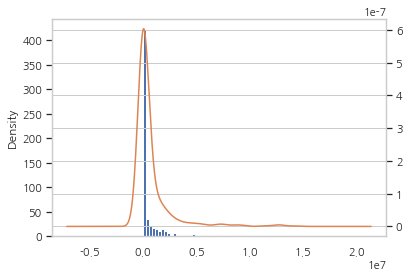

In [43]:
ax = df_train["관객수"].plot(kind='hist', bins= 50)
df_train["관객수"].plot(kind='kde', ax=ax, secondary_y=True)

<AxesSubplot:>

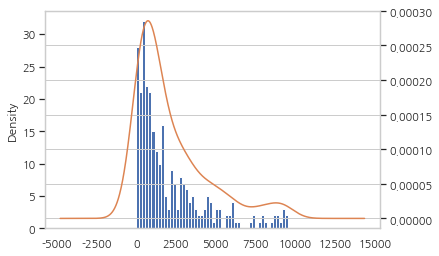

In [44]:
ax = df_train.loc[df_train["관객수"] < 10000, "관객수"].plot.hist(bins = 50)
df_train.loc[df_train["관객수"] < 10000, "관객수"].plot(kind='kde', ax=ax, secondary_y=True)

<AxesSubplot:>

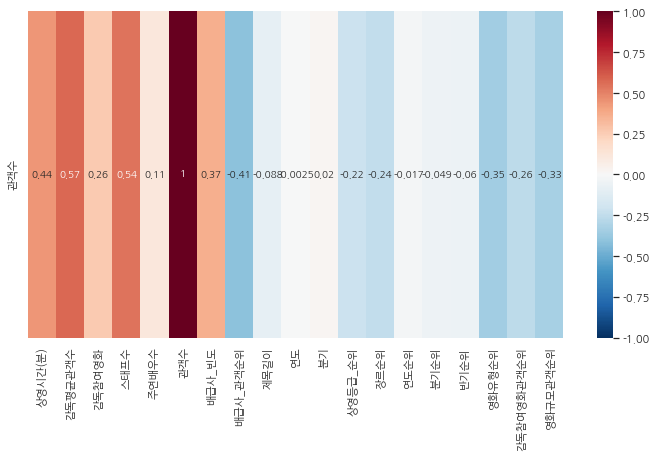

In [45]:
## 관객수와 각 feature 들간의 상관을 봄
plt.figure(figsize = (12,6))
corr_features = df_train.corr(method = "pearson")
sns.heatmap(corr_features[["관객수"]].transpose(), annot= True, cmap = "RdBu_r", vmax = 1, vmin = -1, )

In [46]:
## 관객수와 상관이 0.2를 넘는 feature들만 추출
high_corr = corr_features.loc[abs(corr_features["관객수"]) > 0.2, "관객수"].sort_values(ascending = False)
del high_corr["관객수"]
print(high_corr)
testable_features = high_corr.index.tolist()
len(testable_features)

감독평균관객수       0.573019
스태프수          0.544265
상영시간(분)       0.441452
배급사_빈도        0.365411
감독참여영화        0.259674
상영등급_순위      -0.217651
장르순위         -0.243887
감독참여영화관객순위   -0.263840
영화규모관객순위     -0.328288
영화유형순위       -0.348903
배급사_관객순위     -0.407518
Name: 관객수, dtype: float64


11

각 feature와 관객수 간의 관계를 plotting

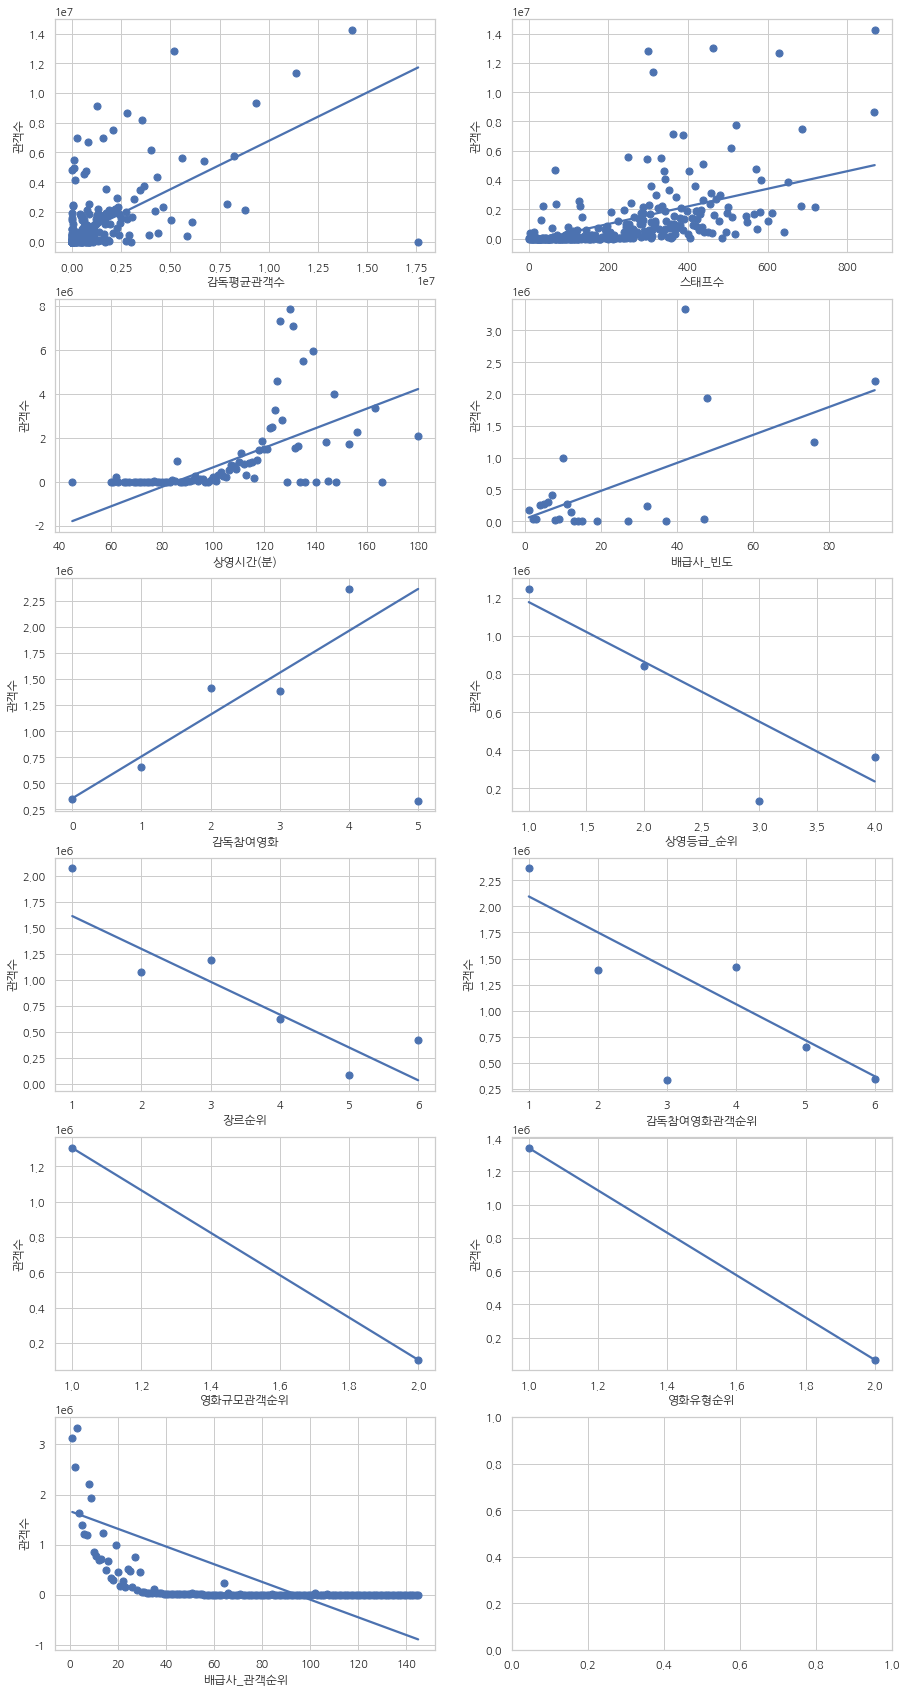

In [47]:
fig = plt.figure(figsize= (15, 30))
axes = fig.subplots(len(testable_features)//2 + len(testable_features)%2, 2)
for idx, f in enumerate(testable_features):
    sns.regplot(data = df_train, x = f, y = "관객수", x_estimator= np.mean, ci = None, ax = axes[idx//2, idx%2])

* "감독평균관객수", "스태프수" , "상영시간(분)", "배급사_관객순위" 의 경우 관객수가 exponential한 변화를 보이므로, log로 변환해봄

In [48]:
to_log_cols = ["감독평균관객수", "스태프수" , "상영시간(분)", "배급사_관객순위"]
log_names = list(map(lambda x: 'log_' + x, to_log_cols))
df_train[log_names] = np.log1p(df_train[to_log_cols])
df_test[log_names] = np.log1p(df_test[to_log_cols])

testable_features.extend(log_names)

* 변환후 조금 더 선형관계로 바뀜

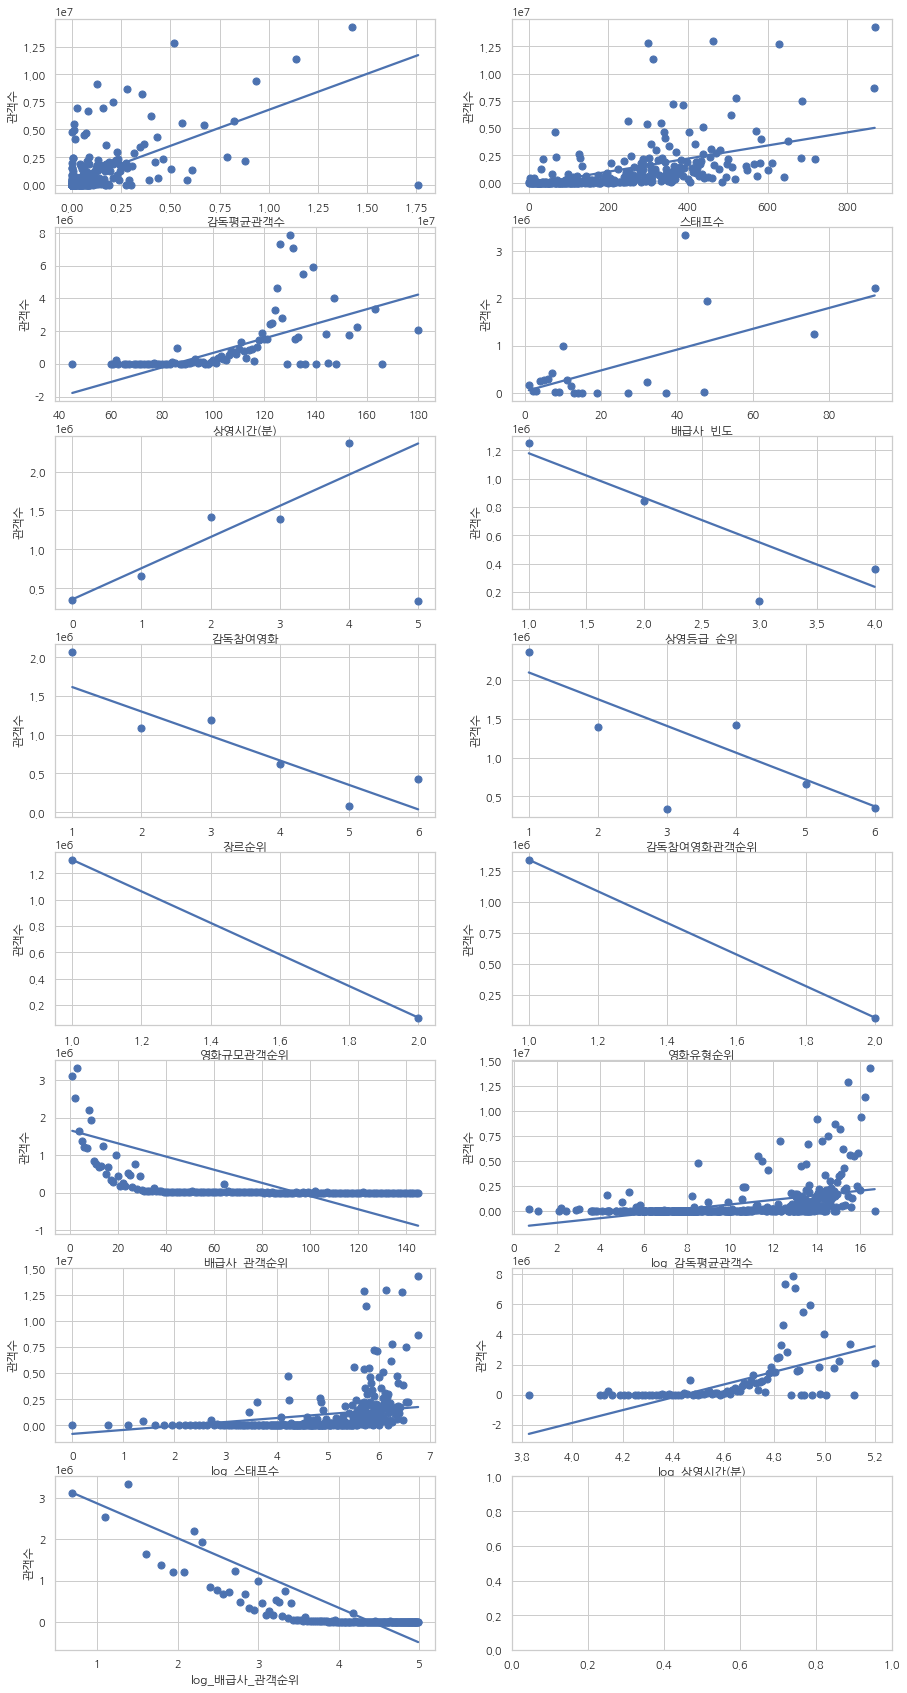

In [49]:
fig = plt.figure(figsize= (15, 30))
axes = fig.subplots(len(testable_features)//2 + len(testable_features)%2, 2)
for idx, f in enumerate(testable_features):
    sns.regplot(data = df_train, x = f, y = "관객수", x_estimator= np.mean, ci = None, ax = axes[idx//2, idx%2])

## 모델 만들기

In [50]:
label_name = '관객수'

In [51]:
feature_names  = testable_features ## 상관이 높았던 변수들만 사용
[testable_features.remove(x) for x in to_log_cols]
feature_names

['배급사_빈도',
 '감독참여영화',
 '상영등급_순위',
 '장르순위',
 '감독참여영화관객순위',
 '영화규모관객순위',
 '영화유형순위',
 'log_감독평균관객수',
 'log_스태프수',
 'log_상영시간(분)',
 'log_배급사_관객순위']

In [52]:
X_train = df_train[feature_names]
y_train = df_train[label_name]
X_test = df_test[feature_names]

* DecisionTreeRegressor 모델 사용

In [53]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state= 42, max_depth= None, max_features = None)

### RandomSearch를 활용해 모델 하이퍼파라미터 최적화

In [54]:
max_depth_list = np.linspace(20, 60, 20, dtype= 'int')
print("max_depth_list: ",max_depth_list)
max_features_list = np.linspace(0.1, 1, 20)
print("max_features_list: ", max_features_list)

max_depth_list:  [20 22 24 26 28 30 32 34 36 38 41 43 45 47 49 51 53 55 57 60]
max_features_list:  [0.1        0.14736842 0.19473684 0.24210526 0.28947368 0.33684211
 0.38421053 0.43157895 0.47894737 0.52631579 0.57368421 0.62105263
 0.66842105 0.71578947 0.76315789 0.81052632 0.85789474 0.90526316
 0.95263158 1.        ]


In [55]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_depth' : max_depth_list, 'max_features' : max_features_list}
clf = RandomizedSearchCV(model, param_distributions= parameters, n_iter = 10, scoring = 'neg_mean_squared_error', n_jobs = -1, cv = 10, random_state = 42)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 41, 43, 45, 47, 49, 51, 53,
       55, 57, 60]),
                                        'max_features': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])},
                   random_state=42, scoring='neg_mean_squared_error')

In [56]:
pd.DataFrame(clf.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
5,0.005663,0.000362,0.003056,0.000249,0.289474,28,"{'max_features': 0.2894736842105263, 'max_dept...",-1.437788e+12,-2.551923e+12,-1.543894e+12,-4.034227e+12,-1.038645e+12,-1.719912e+12,-1.968552e+12,-6.291975e+12,-5.769028e+12,-1.441543e+12,-2.779749e+12,1.811874e+12,1
8,0.003638,0.000270,0.001684,0.000160,0.384211,47,"{'max_features': 0.38421052631578945, 'max_dep...",-2.072177e+12,-3.283248e+12,-4.275225e+12,-2.818948e+12,-8.533625e+11,-1.808347e+12,-1.401025e+12,-3.916954e+12,-3.457040e+12,-4.774682e+12,-2.866101e+12,1.233076e+12,2
9,0.004383,0.000574,0.001996,0.000393,0.384211,32,"{'max_features': 0.38421052631578945, 'max_dep...",-2.072177e+12,-3.283248e+12,-4.275225e+12,-2.818948e+12,-8.533625e+11,-1.808347e+12,-1.401025e+12,-3.916954e+12,-3.457040e+12,-4.774682e+12,-2.866101e+12,1.233076e+12,2
7,0.005604,0.000638,0.002124,0.000402,0.763158,28,"{'max_features': 0.7631578947368421, 'max_dept...",-1.549474e+12,-3.499520e+12,-1.526507e+12,-3.121260e+12,-1.043302e+12,-3.169894e+12,-8.275584e+12,-5.865777e+12,-5.348673e+12,-1.115318e+12,-3.451531e+12,2.268720e+12,4
3,0.007011,0.000478,0.003516,0.001211,0.573684,41,"{'max_features': 0.5736842105263158, 'max_dept...",-1.893874e+12,-3.121015e+12,-1.892275e+12,-3.711715e+12,-9.669409e+11,-5.377309e+12,-3.212682e+12,-9.061439e+12,-4.342406e+12,-1.399190e+12,-3.497885e+12,2.267790e+12,5


In [57]:
-clf.best_score_ # 최고점수 rmse = -(neg_rmse)

2779748654859.202

In [58]:
clf.best_estimator_ # tree depth가 28이고 feature를 0.29를 사용했을 때 모델이 좋음

DecisionTreeRegressor(max_depth=28, max_features=0.2894736842105263,
                      random_state=42)

* best model의 fit을 확인

In [59]:
best_model = clf.best_estimator_
# best_model.fit(X_train, y_train)

In [60]:
fitted_df = df_train[feature_names].copy()
fitted_df[label_name] = y_train
fitted_df["모델예측"] = best_model.predict(X_train)

fitted_df = fitted_df[feature_names + [label_name, "모델예측"]]
fitted_df

,배급사_빈도,감독참여영화,상영등급_순위,장르순위,감독참여영화관객순위,영화규모관객순위,영화유형순위,log_감독평균관객수,log_스태프수,log_상영시간(분),log_배급사_관객순위,관객수,모델예측
0,76,0,4.0,1.0,6.0,1.0,2.0,10.060449,4.521789,4.574711,2.708050,23398,23398.0
1,42,2,4.0,2.0,4.0,1.0,1.0,14.957151,5.961005,4.875197,1.386294,7072501,7072501.0
2,42,4,1.0,1.0,1.0,1.0,1.0,12.304905,5.840642,4.820282,1.386294,6959083,6959083.0
3,48,2,3.0,3.0,4.0,2.0,1.0,10.081425,3.044522,4.624973,2.302585,217866,217866.0
4,42,1,1.0,3.0,5.0,1.0,1.0,0.693147,5.529429,4.691348,1.386294,483387,483387.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,48,1,4.0,4.0,5.0,1.0,1.0,8.251664,6.236370,4.718499,2.302585,1475091,1475091.0
596,42,1,1.0,4.0,5.0,1.0,1.0,13.114456,5.659482,4.852030,1.386294,1716438,1716438.0
597,47,0,4.0,2.0,6.0,1.0,2.0,7.814400,4.820282,4.605170,4.634729,2475,2475.0
598,92,0,1.0,2.0,6.0,1.0,1.0,14.600565,6.068426,4.634729,2.197225,2192525,2192525.0


* 좀 overfit된 것 같다...

In [61]:
error = fitted_df["관객수"] - fitted_df["모델예측"]

<AxesSubplot:>

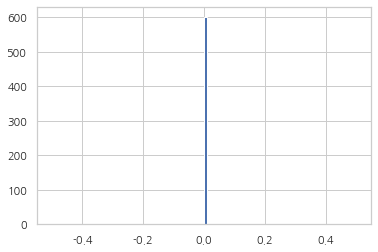

In [62]:
error.hist(bins = 100)

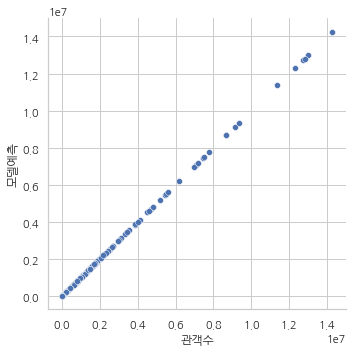

In [63]:
_ = sns.relplot(fitted_df["관객수"], fitted_df["모델예측"])

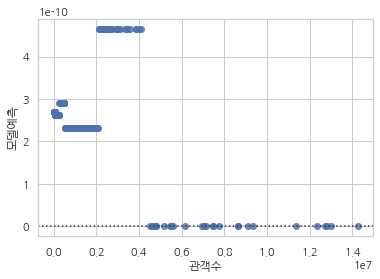

In [64]:
_ = sns.residplot(fitted_df["관객수"], fitted_df["모델예측"])

* 그냥 너무 완벽하게 fitting 됐다...

In [65]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2: ", r2_score(fitted_df["관객수"], fitted_df["모델예측"]))
print("mse: ", mean_squared_error(fitted_df["관객수"], fitted_df["모델예측"]))

r2:  1.0
mse:  0.0


* 관객수와 상관이 높았던 feature만 사용했는데, 그중에도 log변환 했던 feature들이 많이 예측에 영향을 주었다.

<AxesSubplot:>

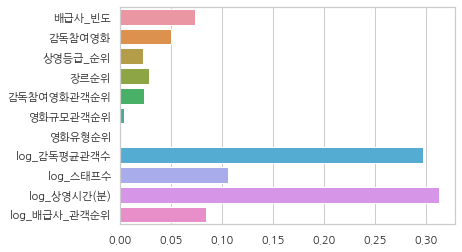

In [66]:
sns.barplot(x = best_model.feature_importances_, y = best_model.feature_names_in_)

## 모델 평가하기

test set에는 관객수 데이터가 없으므로 일단 prediction 후에 10개의 결과만 sample해본 후, 해당 영화의 실제 관객수를 수동으로 가져와 비교해보았다.

In [67]:
predicted_df = df_test.copy()
predicted_df["모델예측"] = best_model.predict(X_test)
predicted_df

,영화제목,배급사,장르,개봉일,상영시간(분),상영등급,감독이름,감독평균관객수,감독참여영화,스태프수,...,분기순위,반기순위,영화유형순위,감독참여영화관객순위,영화규모관객순위,log_감독평균관객수,log_스태프수,log_상영시간(분),log_배급사_관객순위,모델예측
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,...,3.0,1.0,1.0,4.0,1.0,12.613303,5.720312,4.836282,4.174387,9272.0
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,...,3.0,1.0,1.0,1.0,1.0,12.744614,5.620401,4.736198,1.386294,2475797.0
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,...,3.0,2.0,1.0,2.0,1.0,15.252168,6.040255,4.753590,2.197225,5443049.0
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,...,3.0,1.0,1.0,4.0,1.0,13.446391,6.013715,4.762174,1.386294,1346754.0
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,...,3.0,1.0,1.0,5.0,1.0,10.365301,5.942799,4.709530,2.197225,1346754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2.590000e+03,1,4,...,1.0,1.0,2.0,5.0,2.0,7.859799,1.609438,4.369448,4.304065,5105.0
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,3.777228e+05,0,18,...,1.0,2.0,2.0,6.0,2.0,12.841918,2.944439,4.465908,4.382027,9301.0
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,4.969413e+05,0,224,...,1.0,2.0,1.0,6.0,1.0,13.116229,5.416100,4.682131,4.304065,43947.0
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,5.069900e+04,1,68,...,1.0,1.0,1.0,5.0,2.0,10.833681,4.234107,4.634729,4.304065,1504.0


<AxesSubplot:ylabel='Frequency'>

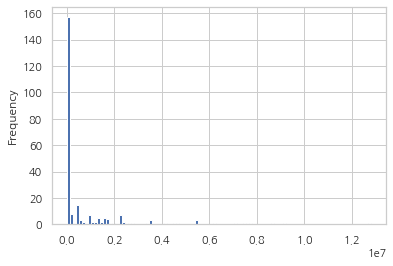

In [68]:
predicted_df["모델예측"].plot.hist(bins =100)

In [69]:
film_samples = predicted_df.sample(10, random_state = 42)
film_samples

,영화제목,배급사,장르,개봉일,상영시간(분),상영등급,감독이름,감독평균관객수,감독참여영화,스태프수,...,분기순위,반기순위,영화유형순위,감독참여영화관객순위,영화규모관객순위,log_감독평균관객수,log_스태프수,log_상영시간(분),log_배급사_관객순위,모델예측
24,탈주,청년필름,드라마,2010-09-02,110,청소년 관람불가,이송희일,3389.000000,0,11,...,2.0,1.0,1.0,6.0,2.0,8.128585,2.484907,4.709530,4.304065,2972.0
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,105942.472222,0,11,...,3.0,2.0,1.0,6.0,2.0,11.570661,2.484907,4.653960,4.174387,21483.0
152,살인자,(주)영화사 빅,공포,2014-01-15,76,청소년 관람불가,이기욱,496941.279249,0,116,...,3.0,2.0,2.0,6.0,1.0,13.116229,4.762174,4.343805,4.304065,14537.0
232,마돈나,리틀빅픽처스,드라마,2015-07-02,120,청소년 관람불가,신수원,771699.000000,1,126,...,2.0,1.0,1.0,5.0,1.0,13.556351,4.844187,4.795791,2.944439,16866.0
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.000000,1,4,...,1.0,1.0,2.0,5.0,2.0,7.859799,1.609438,4.369448,4.304065,5105.0
175,족구왕,KT&G 상상마당,드라마,2014-08-21,104,15세 관람가,우문기,496941.279249,0,202,...,2.0,1.0,1.0,6.0,1.0,13.116229,5.313206,4.653960,4.262680,51120.0
215,플랑크 상수,하준사,드라마,2015-04-30,69,청소년 관람불가,조성규,4849.333333,0,64,...,4.0,1.0,2.0,6.0,2.0,8.486803,4.174387,4.248495,4.804021,37122.0
150,만찬,인디스토리,드라마,2014-01-23,125,15세 관람가,김동현,377722.784144,0,77,...,3.0,1.0,1.0,6.0,2.0,12.841918,4.356709,4.836282,4.382027,11260.0
9,반가운 살인자,롯데쇼핑(주)롯데엔터테인먼트,코미디,2010-04-08,107,15세 관람가,김동욱,496941.279249,0,255,...,4.0,2.0,1.0,6.0,1.0,13.116229,5.545177,4.682131,4.304065,472009.0
113,지슬 - 끝나지 않은 세월 2,영화사 진진,드라마,2013-03-21,108,15세 관람가,오멸,1597.000000,0,44,...,3.0,2.0,1.0,6.0,2.0,7.376508,3.806662,4.691348,4.276666,2972.0


In [70]:
film_samples["관객수"] = [1854, 9032, 88199, 18112, 675, 45701, 592, 1948, 599176, 143715] 
film_samples[["영화제목", "모델예측", "관객수"]]

,영화제목,모델예측,관객수
24,탈주,2972.0,1854
6,경계도시 2,21483.0,9032
152,살인자,14537.0,88199
232,마돈나,16866.0,18112
238,해에게서 소년에게,5105.0,675
175,족구왕,51120.0,45701
215,플랑크 상수,37122.0,592
150,만찬,11260.0,1948
9,반가운 살인자,472009.0,599176
113,지슬 - 끝나지 않은 세월 2,2972.0,143715


* overfit된 모델인데 생각보다 괜찮...?

<AxesSubplot:xlabel='관객수', ylabel='영화제목'>

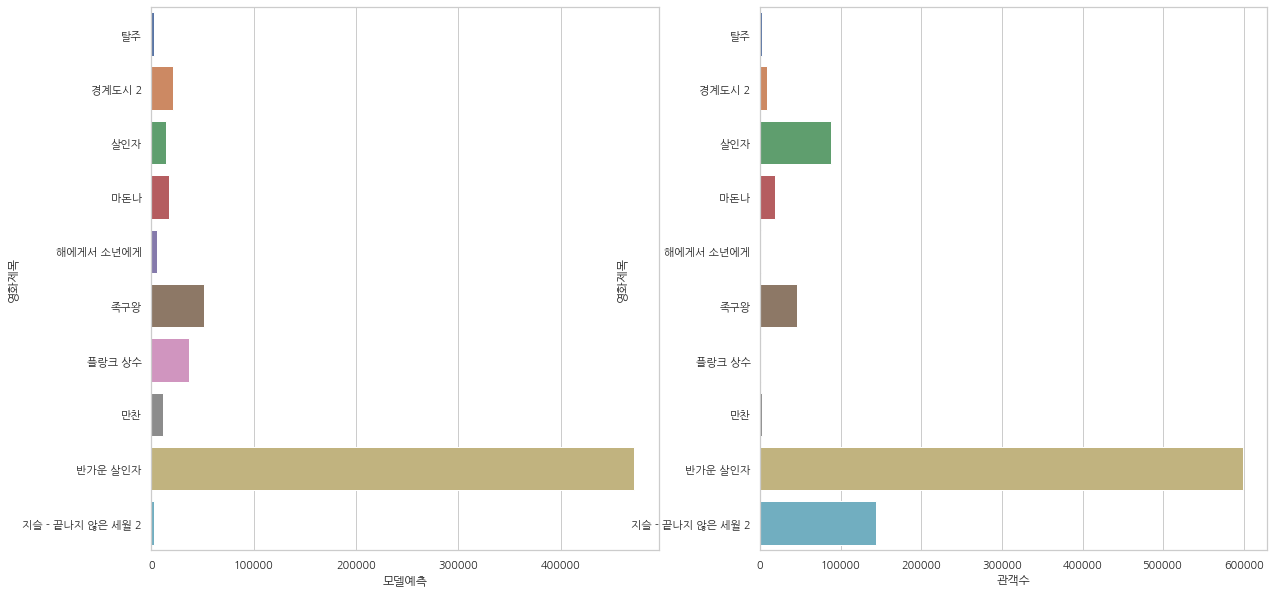

In [71]:
fig = plt.figure(figsize= (20, 10))
axes = fig.subplots(1, 2)
sns.barplot(data = film_samples, y= "영화제목", x = "모델예측", ax = axes[0])
sns.barplot(data = film_samples, y= "영화제목", x = "관객수", ax = axes[1])

In [72]:
predict_error = film_samples["관객수"] - film_samples["모델예측"]

<AxesSubplot:>

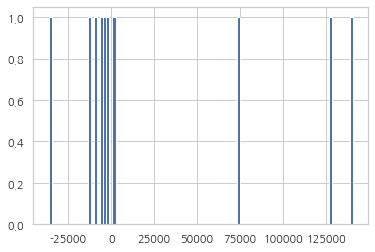

In [73]:
predict_error.hist(bins = 100)

In [74]:
print("r2: ", r2_score(film_samples["관객수"], film_samples["모델예측"]))
print("mse: ", mean_squared_error(film_samples["관객수"], film_samples["모델예측"]))

r2:  0.8599708037739533
mse:  4303410272.8


In [75]:
film_samples[["관객수", "모델예측"]].corr()

,관객수,모델예측
관객수,1.00000,0.95661
모델예측,0.95661,1.00000


* 상관이 높게 나오는 이유는, sample된 10개중 한작품(반가운 살인자)가 관객수가 매우 많은데, 이를 어느정도 잘 예측했기 때문인듯…

<AxesSubplot:xlabel='관객수', ylabel='모델예측'>

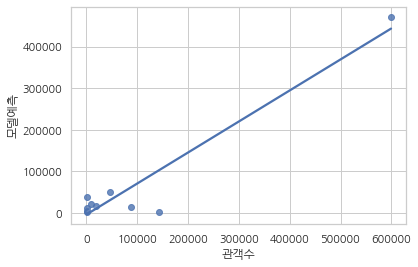

In [76]:
sns.regplot(data = film_samples, x = "관객수", y = "모델예측", ci = False)

## 결론

관객수를 예측하는데, 배급사, 스태프수, 상영시간, 감독의 평균관객순위 등이 중요한 예측 변수가 됨을 확인했다.
다만 decisiontree 모델은 쉽게 overfit된다는 특성이 있다고 들었는데, 아니나 다를까 train 데이터를 너무나 완벽하게 설명해버렸다.
그럼에도 test data에 대한 예측을 나쁘지 않게 했는데, 전체 실제데이터를 확인해 볼 수 있으면 좋겠다.
아직 머신러닝 실력이 부족해서, 이런 상황에 대한 대처법이 부족한 것 같지만, 재밌는 주제 덕분에 즐겁게 할 수 있었던 프로젝트였던 것 같다.